### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('data/AirPassengers.csv')

In [20]:
# Convert to DataFrame
sunspots_df = sunspots.data

# Convert 'Year' to datetime and set it as the index, dropping the original 'Year' column
sunspots_df['YEAR'] = pd.to_datetime(sunspots_df['YEAR'].astype(int), format='%Y')

# Set index to Year and drop that column
sunspots_df = sunspots_df.set_index('YEAR', drop=True)

print(sunspots_df.head())

            SUNACTIVITY
YEAR                   
1700-01-01          5.0
1701-01-01         11.0
1702-01-01         16.0
1703-01-01         23.0
1704-01-01         36.0


<Axes: xlabel='YEAR'>

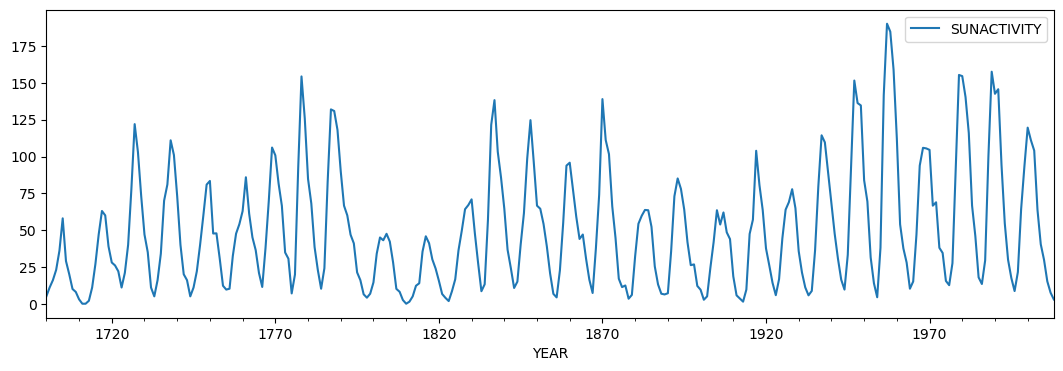

In [27]:
sunspots_df.plot(figsize=(13,4))

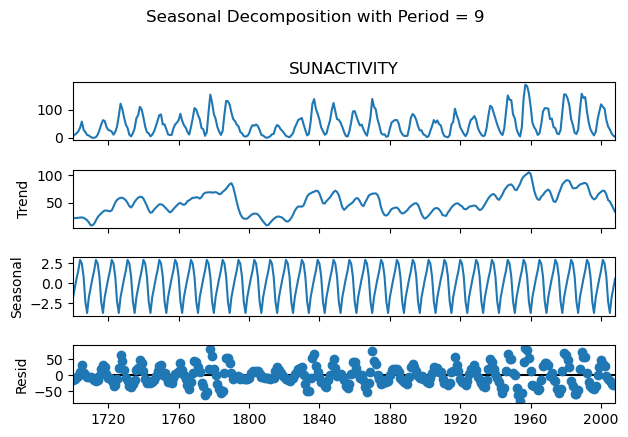

-------------------------------------------------------------------------------------------------


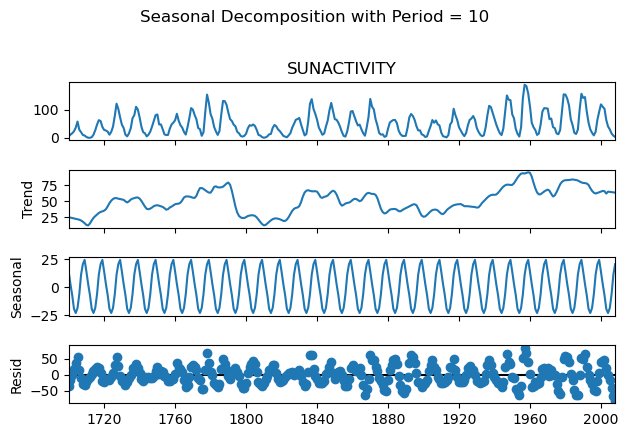

-------------------------------------------------------------------------------------------------


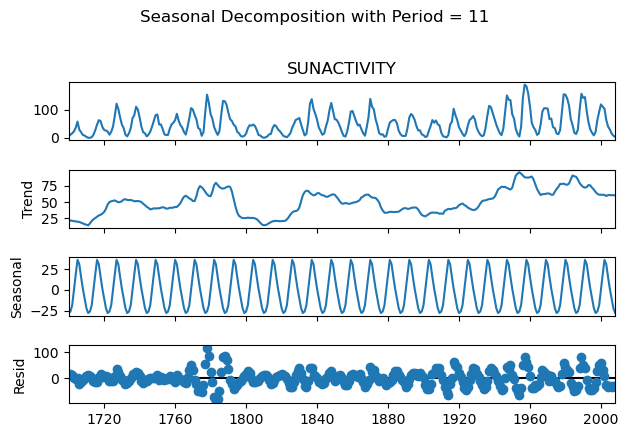

-------------------------------------------------------------------------------------------------


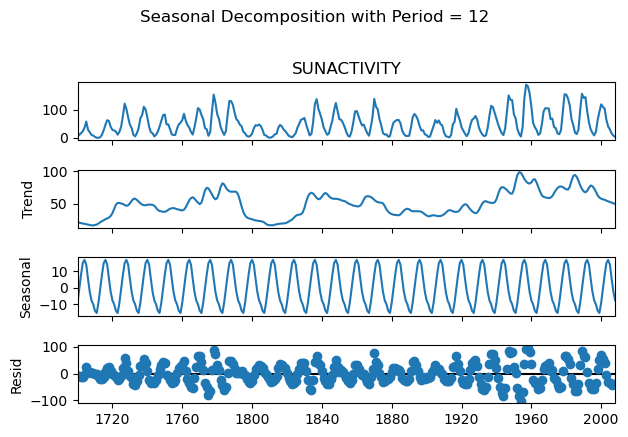

-------------------------------------------------------------------------------------------------


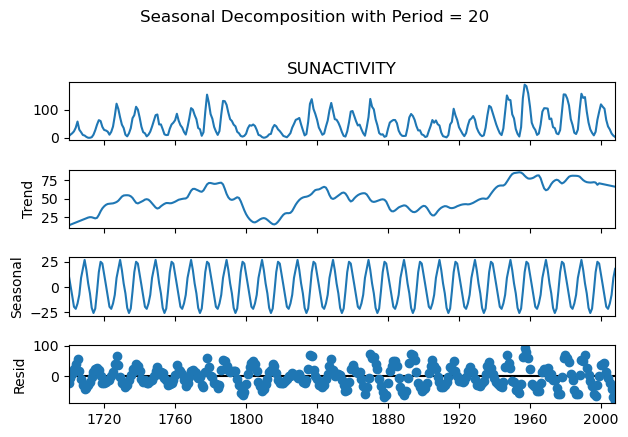

-------------------------------------------------------------------------------------------------


In [68]:
# Try different period values
for period in [9, 10, 11, 12, 20]:
    decomposition = seasonal_decompose(sunspots_df['SUNACTIVITY'], model='additive', period=period, extrapolate_trend=1)
    fig = decomposition.plot()
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.5, top=0.75)  # Increase hspace for vertical space, top for title space
    
    # Add a title with more space above the plots
    plt.suptitle(f'Seasonal Decomposition with Period = {period}', y=0.9)
    
    plt.show()

    print('-------------------------------------------------------------------------------------------------')

In [63]:
# Convert Month Feature into Datetime format
air['Month'] = pd.to_datetime(air['Month'])

# Set index by Month and drop that column
air.set_index('Month', drop=True, inplace=True)

# Display head of dataframe
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

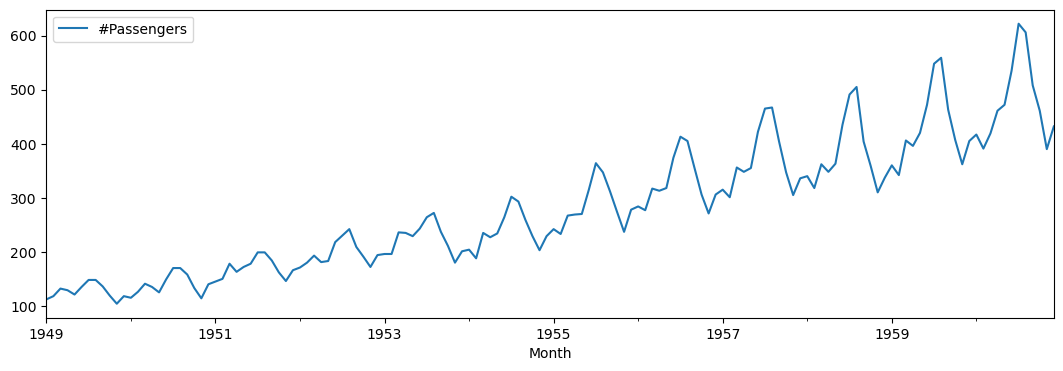

In [64]:
air.plot(figsize=(13,4))

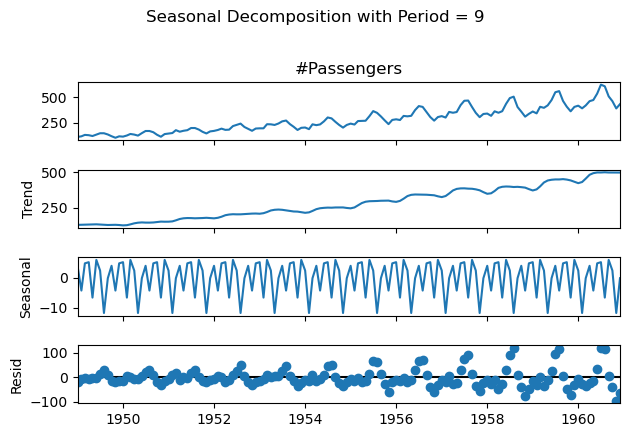

-------------------------------------------------------------------------------------------------


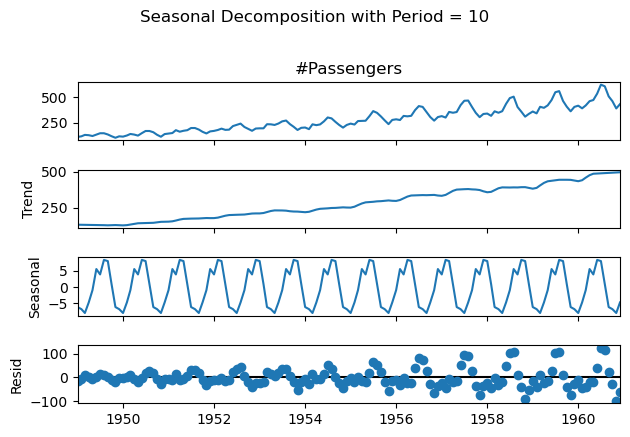

-------------------------------------------------------------------------------------------------


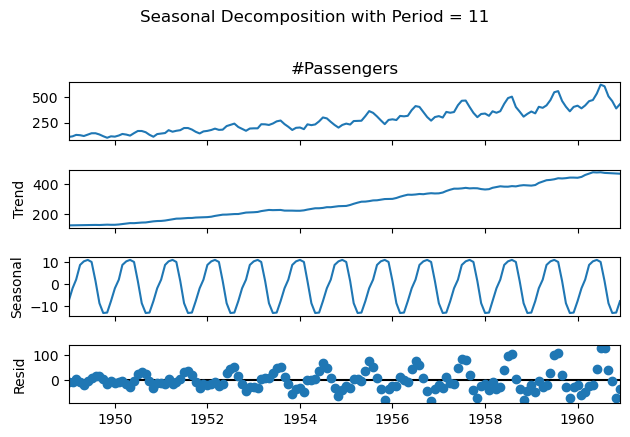

-------------------------------------------------------------------------------------------------


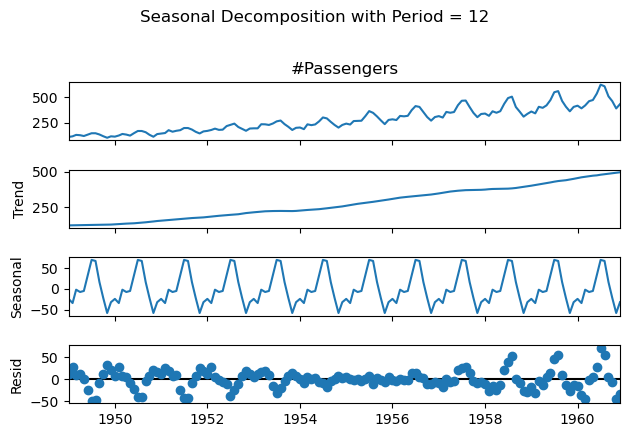

-------------------------------------------------------------------------------------------------


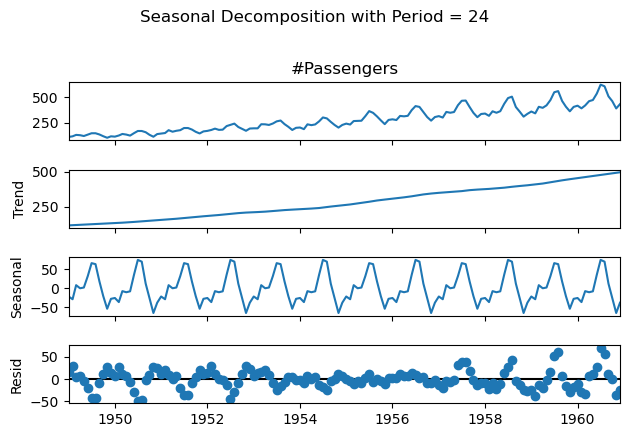

-------------------------------------------------------------------------------------------------


In [69]:
# Try different period values
for period in [9, 10, 11, 12, 24]:
    decomposition = seasonal_decompose(air['#Passengers'], model='additive', period=period, extrapolate_trend=1)
    fig = decomposition.plot()
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(hspace=0.5, top=0.75)  # Increase hspace for vertical space, top for title space
    
    # Add a title with more space above the plots
    plt.suptitle(f'Seasonal Decomposition with Period = {period}', y=0.9)
    
    plt.show()

    print('-------------------------------------------------------------------------------------------------')